In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

In [3]:
def trend_plot(df, x, y):
    if x == 'l':
        r = df['Oval radius (mm)'].unique()
        n = np.shape(r)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Oval radius (mm)'] == r[i]]
            ax[i].plot(df_process['Flexure length (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Flexure length (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('R = {:.1f}'.format(r[i]))
    elif x == 'r':
        l = df['Flexure length (mm)'].unique()
        n = np.shape(l)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Flexure length (mm)'] == l[i]]
            ax[i].plot(df_process['Oval radius (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Oval radius (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('L = {:.1f}'.format(l[i]))
    plt.tight_layout()
    plt.show()

## First order bending

In [4]:
df1 = pd.read_csv(r'..\Final_data\First_order_bending\cutout_oval_filleted_first_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\First_order_bending\cutout_oval_filleted_first_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 3):
    new_column_name.append(','.join(column_name[i:i+3]))
df1.columns = new_column_name
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, b1=0.2, F1=1  \
0          0.0     0.0     0.0                       0.000000   
1          0.0     0.0     0.1                       0.000000   
2          0.0     0.0     0.2                       0.000000   
3          0.0     0.0     0.3                       0.000000   
4          0.0     0.0     0.4                       0.000000   
...        ...     ...     ...                            ...   
169735    41.3     4.0     0.5                      -1.151480   
169736    41.3     4.0     0.6                      -1.151444   
169737    41.3     4.0     0.7                      -1.151412   
169738    41.3     4.0     0.8                      -1.151386   
169739    41.3     4.0     0.9                      -1.151367   

        w (mm) @ L1=1.3, b1=0.3, F1=1  w (mm) @ L1=1.3, b1=0.4, F1=1  \
0                        2.915895e-37                   1.441502e-20   
1                        0.000000e+00                   0.000000e+00   
2                        0.000000e+00                   0.000000e+00   
3                        0.000000e+00                   0.000000e+00   
4                        0.000000e+00                   0.000000e+00   
...                               ...                            ...   
169735                  -1.167303e+00                  -1.184924e+00   
169736                  -1.167267e+00                  -1.184888e+00   
169737                  -1.167237e+00                  -1.184858e+00   
169738                  -1.167212e+00                  -1.184833e+00   
169739                  -1.167192e+00                  -1.184813e+00   

        w (mm) @ L1=1.3, b1=0.5, F1=1  w (mm) @ L1=1.3, b1=0.6, F1=1  \
0                       -9.143946e-21                   9.222996e-21   
1                        0.000000e+00                   0.000000e+00   
2                        0.000000e+00                   0.000000e+00   
3                        0.000000e+00                   0.000000e+00   
4                        0.000000e+00                   0.000000e+00   
...                               ...                            ...   
169735                  -1.204118e+00                  -1.224754e+00   
169736                  -1.204082e+00                  -1.224718e+00   
169737                  -1.204052e+00                  -1.224686e+00   
169738                  -1.204026e+00                  -1.224660e+00   
169739                  -1.204007e+00                  -1.224641e+00   

        w (mm) @ L1=1.3, b1=0.7, F1=1  w (mm) @ L1=1.3, b1=0.8, F1=1  ...  \
0                        3.868204e-21                   2.916516e-37  ...   
1                        0.000000e+00                   0.000000e+00  ...   
2                        0.000000e+00                   0.000000e+00  ...   
3                        0.000000e+00                   0.000000e+00  ...   
4                        0.000000e+00                   0.000000e+00  ...   
...                               ...                            ...  ...   
169735                  -1.246818e+00                  -1.270341e+00  ...   
169736                  -1.246782e+00                  -1.270303e+00  ...   
169737                  -1.246751e+00                  -1.270268e+00  ...   
169738                  -1.246726e+00                  -1.270236e+00  ...   
169739                  -1.246706e+00                  -1.270217e+00  ...   

        w (mm) @ L1=2.3, b1=0.9, F1=0.98  w (mm) @ L1=2.3, b1=1, F1=0.98  \
0                          -3.670247e-21                        0.000000   
1                           0.000000e+00                        0.000000   
2                           0.000000e+00                        0.000000   
3                           0.000000e+00                        0.000000   
4                           0.000000e+00                        0.000000   
...                                  ...                             ...   
169735                     -1.785782e+00

In [5]:
df2 = pd.read_csv(r'..\Final_data\First_order_bending\cutout_oval_filleted_first_order_bending_stress_final.csv', skiprows = 4)
df2.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df2 = df2.round({'Flexure length (mm)': 1, 'Oval radius (mm)': 1, 'Applied force (N)': 2})
df2

Flexure length (mm)  Oval radius (mm)  Applied force (N)  \
0                    1.3               0.2               1.00   
1                    1.3               0.3               1.00   
2                    1.3               0.4               1.00   
3                    1.3               0.5               1.00   
4                    1.3               0.6               1.00   
..                   ...               ...                ...   
182                  2.3               1.4               0.98   
183                  2.3               1.5               0.98   
184                  2.3               1.6               0.98   
185                  2.3               1.7               0.98   
186                  2.3               1.8               0.98   

     Max von Mises stress (N/m^2)  
0                    1.227042e+08  
1                    1.258332e+08  
2                    1.266444e+08  
3                    1.318451e+08  
4                    1.312863e+08  
..                            ...  
182                  1.404790e+08  
183                  1.389543e+08  
184                  1.381146e+08  
185                  1.361993e+08  
186                  1.352949e+08  

[187 rows x 4 columns]

<ipython-input-6-8273c255cce6>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


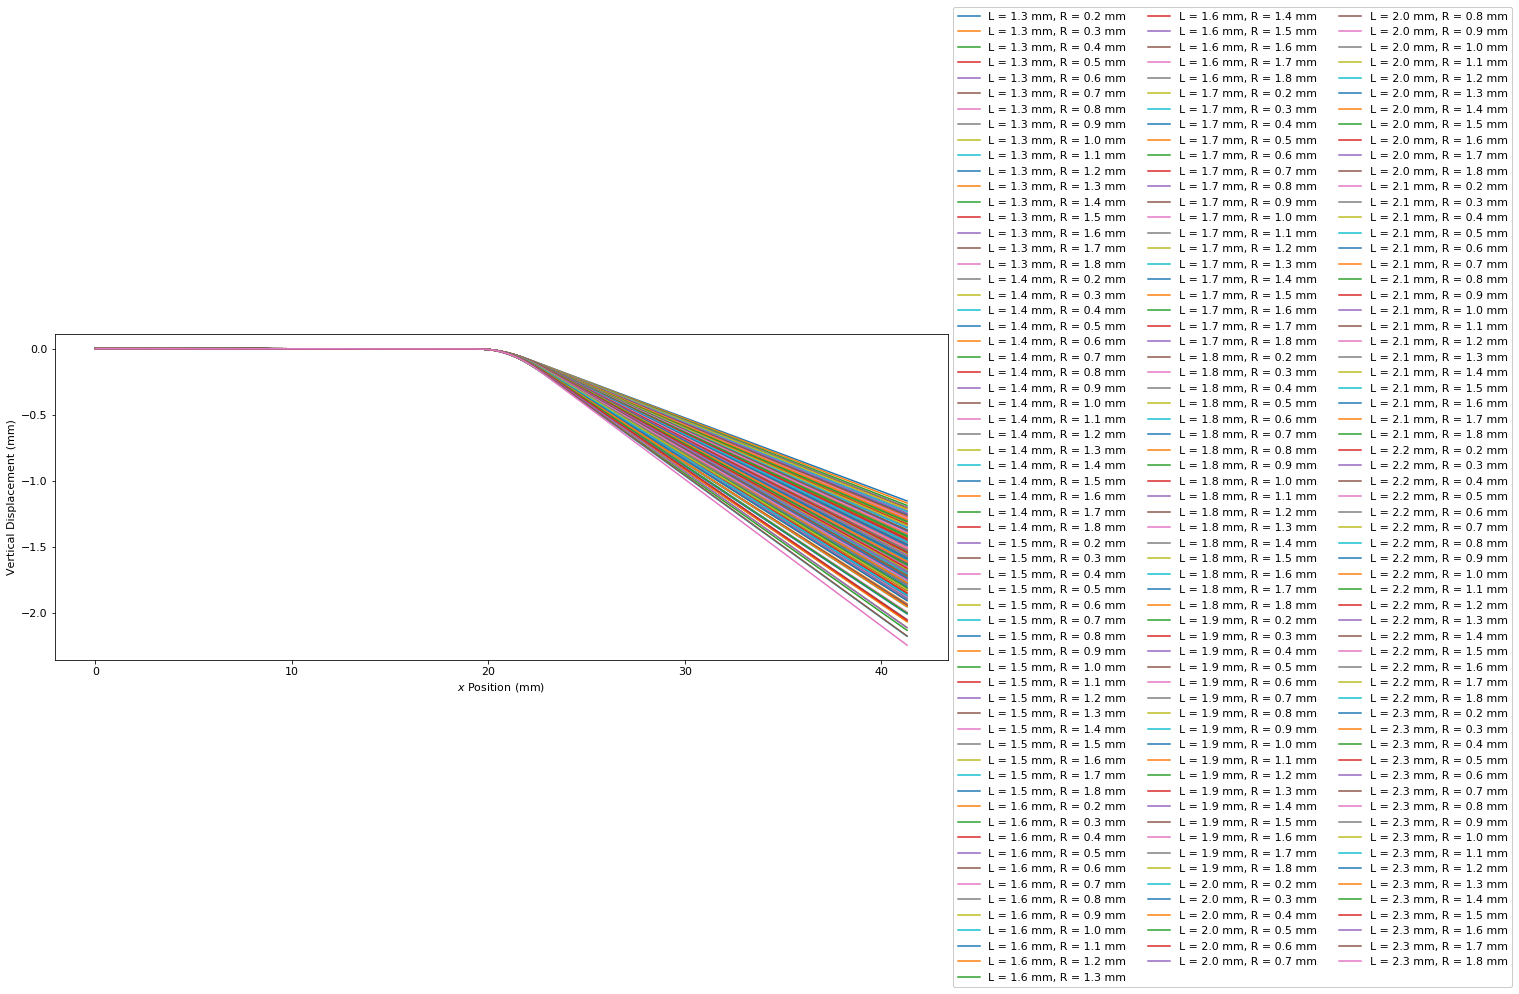

In [6]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df1.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    r = float(re.findall(r'b1=(\d\.?\d?)', colname)[0])
    x_lim = 20.0 + l
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, R = {:.1f} mm'.format(l, r))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [7]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (df2['Flexure length (mm)'] + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Flexure length (mm)  Oval radius (mm)  Applied force (N)  \
0                    1.3               0.2               1.00   
1                    1.3               0.3               1.00   
2                    1.3               0.4               1.00   
3                    1.3               0.5               1.00   
4                    1.3               0.6               1.00   
..                   ...               ...                ...   
182                  2.3               1.4               0.98   
183                  2.3               1.5               0.98   
184                  2.3               1.6               0.98   
185                  2.3               1.7               0.98   
186                  2.3               1.8               0.98   

     Max von Mises stress (N/m^2)  X rotation pivot (mm)  Torque (Nm)  \
0                    1.227042e+08              20.582462     0.020718   
1                    1.258332e+08              20.583173     0.020717   
2                    1.266444e+08              20.583954     0.020716   
3                    1.318451e+08              20.584766     0.020715   
4                    1.312863e+08              20.585633     0.020714   
..                            ...                    ...          ...   
182                  1.404790e+08              21.079355     0.020796   
183                  1.389543e+08              21.080630     0.020795   
184                  1.381146e+08              21.081960     0.020794   
185                  1.361993e+08              21.083367     0.020792   
186                  1.352949e+08              21.084846     0.020791   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                3.179843                    0.006515   
1                3.223576                    0.006427   
2                3.272279                    0.006331   
3                3.325319                    0.006230   
4                3.382342                    0.006124   
..                    ...                         ...   
182              5.646844                    0.003683   
183              5.795375                    0.003588   
184              5.956443                    0.003491   
185              6.132381                    0.003391   
186              6.326719                    0.003286   

     Normalised 1st order stress (N/m^2°)  
0                            3.858812e+07  
1                            3.903528e+07  
2                            3.870220e+07  
3                            3.964884e+07  
4                            3.881520e+07  
..                                    ...  
182                          2.487744e+07  
183                          2.397677e+07  
184                          2.318743e+07  
185                          2.220985e+07  
186                          2.138469e+07  

[187 rows x 9 columns]

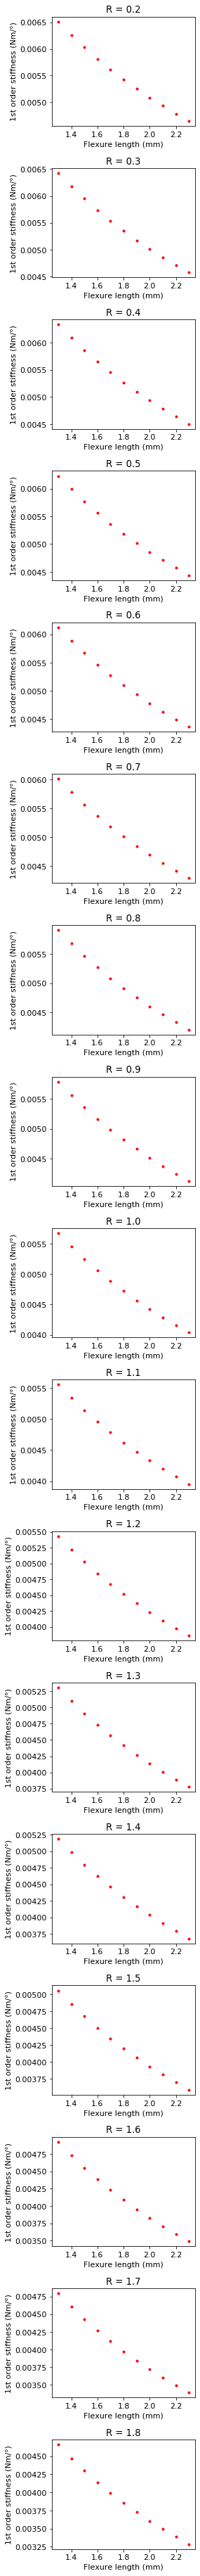

In [8]:
trend_plot(df2, 'l', '1st order stiffness (Nm/°)')

## Second order bending

In [9]:
df3 = pd.read_csv(r'..\Final_data\Second_order_bending\cutout_oval_filleted_second_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\Second_order_bending\cutout_oval_filleted_second_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 2):
    new_column_name.append(','.join(column_name[i:i+2]))
df3.columns = new_column_name
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, b1=0.2  \
0          0.0     0.0     0.0             3.607764e-19   
1          0.0     0.0     0.1             0.000000e+00   
2          0.0     0.0     0.2             0.000000e+00   
3          0.0     0.0     0.3             0.000000e+00   
4          0.0     0.0     0.4             0.000000e+00   
...        ...     ...     ...                      ...   
169735    41.3     4.0     0.5            -1.494993e-01   
169736    41.3     4.0     0.6            -1.484879e-01   
169737    41.3     4.0     0.7            -1.475931e-01   
169738    41.3     4.0     0.8            -1.468150e-01   
169739    41.3     4.0     0.9            -1.463549e-01   

        w (mm) @ L1=1.3, b1=0.3  w (mm) @ L1=1.3, b1=0.4  \
0                      0.000000             3.028310e-19   
1                      0.000000             0.000000e+00   
2                      0.000000             0.000000e+00   
3                      0.000000             0.000000e+00   
4                      0.000000             0.000000e+00   
...                         ...                      ...   
169735                -0.149572            -1.501797e-01   
169736                -0.148630            -1.492675e-01   
169737                -0.147850            -1.484463e-01   
169738                -0.147231            -1.477163e-01   
169739                -0.146774            -1.472512e-01   

        w (mm) @ L1=1.3, b1=0.5  w (mm) @ L1=1.3, b1=0.6  \
0                 -1.888605e-19             1.888438e-19   
1                  0.000000e+00             0.000000e+00   
2                  0.000000e+00             0.000000e+00   
3                  0.000000e+00             0.000000e+00   
4                  0.000000e+00             0.000000e+00   
...                         ...                      ...   
169735            -1.504539e-01            -1.514674e-01   
169736            -1.495544e-01            -1.504554e-01   
169737            -1.488214e-01            -1.495638e-01   
169738            -1.482549e-01            -1.487924e-01   
169739            -1.477855e-01            -1.483356e-01   

        w (mm) @ L1=1.3, b1=0.7  w (mm) @ L1=1.3, b1=0.8  ...  \
0                  7.793986e-20            -1.903868e-19  ...   
1                  0.000000e+00             0.000000e+00  ...   
2                  0.000000e+00             0.000000e+00  ...   
3                  0.000000e+00             0.000000e+00  ...   
4                  0.000000e+00             0.000000e+00  ...   
...                         ...                      ...  ...   
169735            -1.514989e-01            -1.521175e-01  ...   
169736            -1.505920e-01            -1.512158e-01  ...   
169737            -1.498462e-01            -1.504791e-01  ...   
169738            -1.492616e-01            -1.499074e-01  ...   
169739            -1.488144e-01            -1.494503e-01  ...   

        w (mm) @ L1=2.3, b1=0.9  w (mm) @ L1=2.3, b1=1  \
0                      0.000000               0.000000   
1                      0.000000               0.000000   
2                      0.000000               0.000000   
3                      0.000000               0.000000   
4                      0.000000               0.000000   
...                         ...                    ...   
169735                -0.250761              -0.252506   
169736                -0.250793              -0.252538   
169737                -0.250787              -0.252532   
169738                -0.250769              -0.252515   
169739                -0.250740              -0.252485   

        w (mm) @ L1=2.3, b1=1.1  w (mm) @ L1=2.3, b1=1.2  \
0                  1.161079e-19                 0.000000   
1                  0.000000e+00                 0.000000   
2                  0.000000e+00                 0.000000   
3                  0.000000e+00                 0.000000   
4                  0.000000e+00                 0.000000   
...                

In [10]:
df4 = pd.read_csv(r'..\Final_data\Second_order_bending\cutout_oval_filleted_second_order_bending_stress_final.csv', skiprows = 4)
df4.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df4['Applied force (N)'] = np.full(df4.shape[0], 35.0).round(1)
df4 = df4.round({'Flexure length (mm)': 1, 'Oval radius (mm)': 1, 'Applied force (N)': 1})
df4

Flexure length (mm)  Oval radius (mm)  Max von Mises stress (N/m^2)  \
0                    1.3               0.2                  1.956299e+08   
1                    1.3               0.3                  1.977381e+08   
2                    1.3               0.4                  1.980926e+08   
3                    1.3               0.5                  2.003911e+08   
4                    1.3               0.6                  2.033740e+08   
..                   ...               ...                           ...   
182                  2.3               1.4                  3.190861e+08   
183                  2.3               1.5                  3.210637e+08   
184                  2.3               1.6                  3.204121e+08   
185                  2.3               1.7                  3.192496e+08   
186                  2.3               1.8                  3.208159e+08   

     Applied force (N)  
0                 35.0  
1                 35.0  
2                 35.0  
3                 35.0  
4                 35.0  
..                 ...  
182               35.0  
183               35.0  
184               35.0  
185               35.0  
186               35.0  

[187 rows x 4 columns]

<ipython-input-11-c96448f9432d>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


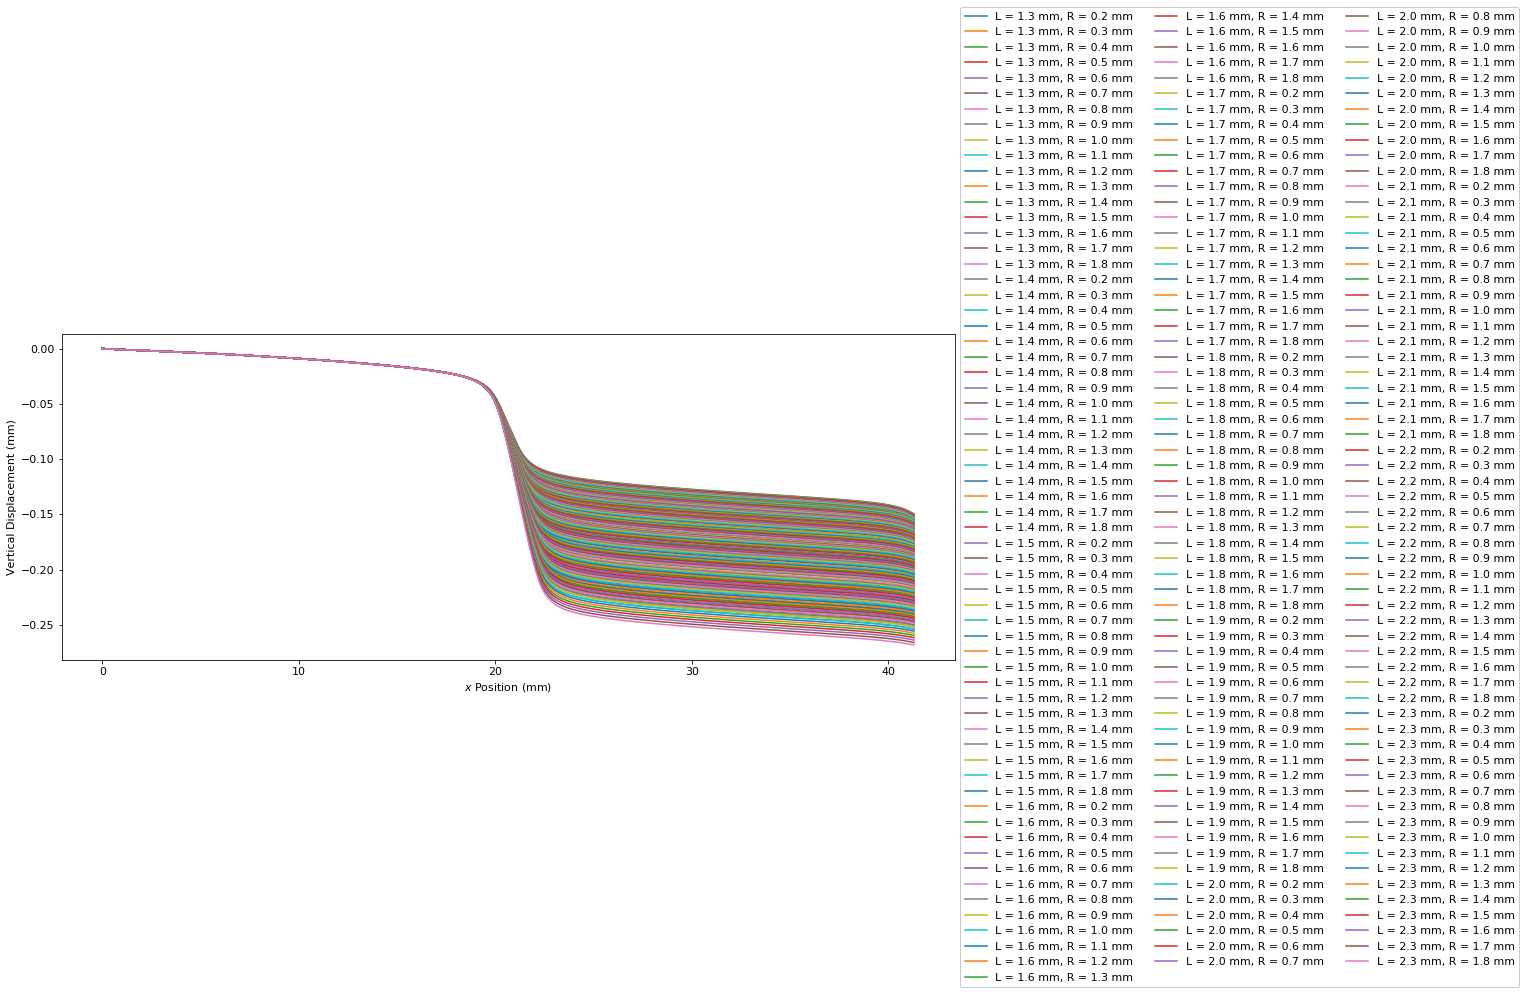

In [11]:
n = df3.shape[1] - 3
displacement = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df3.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    r = float(re.findall(r'b1=(\d\.?\d?)', colname)[0])
    x_lim = math.ceil(10.0 * (20.0 + l)) / 10.0
    df_process = df3[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    displacement[i] = (df_process[df_process['X (mm)'] == 20.0][colname].values[0] - df_process[df_process['X (mm)'] == x_lim][colname].values[0]) * 0.001
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, R = {:.1f} mm'.format(l, r))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [12]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Flexure length (mm)  Oval radius (mm)  Max von Mises stress (N/m^2)  \
0                    1.3               0.2                  1.956299e+08   
1                    1.3               0.3                  1.977381e+08   
2                    1.3               0.4                  1.980926e+08   
3                    1.3               0.5                  2.003911e+08   
4                    1.3               0.6                  2.033740e+08   
..                   ...               ...                           ...   
182                  2.3               1.4                  3.190861e+08   
183                  2.3               1.5                  3.210637e+08   
184                  2.3               1.6                  3.204121e+08   
185                  2.3               1.7                  3.192496e+08   
186                  2.3               1.8                  3.208159e+08   

     Applied force (N)  Displacement (m)  2nd order stiffness (N/m)  \
0                 35.0          0.000049              721456.071325   
1                 35.0          0.000049              715716.283056   
2                 35.0          0.000049              709406.112045   
3                 35.0          0.000050              702773.907250   
4                 35.0          0.000050              695958.296511   
..                 ...               ...                        ...   
182               35.0          0.000157              223493.172661   
183               35.0          0.000159              220673.578892   
184               35.0          0.000161              217816.467824   
185               35.0          0.000163              214908.161764   
186               35.0          0.000165              211923.257985   

     Normalised 2nd order stress (N/m^3)  
0                           4.032524e+12  
1                           4.043553e+12  
2                           4.015089e+12  
3                           4.023703e+12  
4                           4.043994e+12  
..                                   ...  
182                         2.037530e+12  
183                         2.024293e+12  
184                         1.994029e+12  
185                         1.960267e+12  
186                         1.942524e+12  

[187 rows x 7 columns]

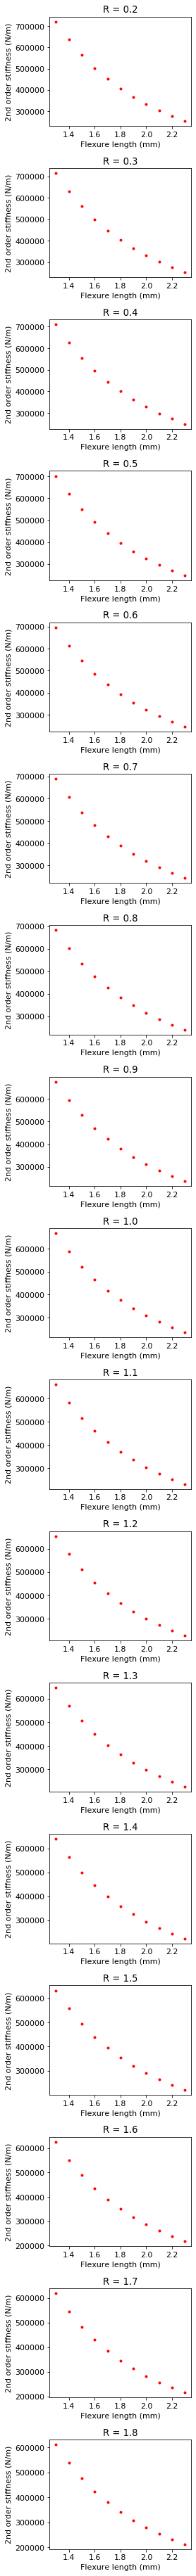

In [13]:
trend_plot(df4, 'l', '2nd order stiffness (N/m)')

## Performance characterisation

In [14]:
df5 = df2[['Flexure length (mm)', 'Oval radius (mm)', 'X rotation pivot (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['Displacement (m)'] = df4['Displacement (m)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5

Flexure length (mm)  Oval radius (mm)  X rotation pivot (mm)  \
0                    1.3               0.2              20.582462   
1                    1.3               0.3              20.583173   
2                    1.3               0.4              20.583954   
3                    1.3               0.5              20.584766   
4                    1.3               0.6              20.585633   
..                   ...               ...                    ...   
182                  2.3               1.4              21.079355   
183                  2.3               1.5              21.080630   
184                  2.3               1.6              21.081960   
185                  2.3               1.7              21.083367   
186                  2.3               1.8              21.084846   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                3.179843                    0.006515   
1                3.223576                    0.006427   
2                3.272279                    0.006331   
3                3.325319                    0.006230   
4                3.382342                    0.006124   
..                    ...                         ...   
182              5.646844                    0.003683   
183              5.795375                    0.003588   
184              5.956443                    0.003491   
185              6.132381                    0.003391   
186              6.326719                    0.003286   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.858812e+07                  1.227042e+08   
1                            3.903528e+07                  1.258332e+08   
2                            3.870220e+07                  1.266444e+08   
3                            3.964884e+07                  1.318451e+08   
4                            3.881520e+07                  1.312863e+08   
..                                    ...                           ...   
182                          2.487744e+07                  1.404790e+08   
183                          2.397677e+07                  1.389543e+08   
184                          2.318743e+07                  1.381146e+08   
185                          2.220985e+07                  1.361993e+08   
186                          2.138469e+07                  1.352949e+08   

     Displacement (m)  2nd order stiffness (N/m)  2nd order max stress (N/m^2)  
0            0.000049              721456.071325                  1.956299e+08  
1            0.000049              715716.283056                  1.977381e+08  
2            0.000049              709406.112045                  1.980926e+08  
3            0.000050              702773.907250                  2.003911e+08  
4            0.000050              695958.296511                  2.033740e+08  
..                ...                        ...                           ...  
182          0.000157              223493.172661                  3.190861e+08  
183          0.000159              220673.578892                  3.210637e+08  
184          0.000161              217816.467824                  3.204121e+08  
185          0.000163              214908.161764                  3.192496e+08  
186          0.000165              211923.257985                  3.208159e+08  

[187 rows x 10 columns]

In [15]:
df5['Parameter1'] = df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']
df5['Parameter2'] = df5['1st order max stress (N/m^2)'] / (df5['1st order stiffness (Nm/°)'] * df5['Deflection angle (°)'])
df5['Parameter3'] = df5['2nd order max stress (N/m^2)'] / (df5['2nd order stiffness (N/m)'] * df5['Displacement (m)'])
df5['Dimensionless'] = (df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']) * ((40.0 + df5['Flexure length (mm)'] - df5['X rotation pivot (mm)']) * 0.001)**2
df5

Flexure length (mm)  Oval radius (mm)  X rotation pivot (mm)  \
0                    1.3               0.2              20.582462   
1                    1.3               0.3              20.583173   
2                    1.3               0.4              20.583954   
3                    1.3               0.5              20.584766   
4                    1.3               0.6              20.585633   
..                   ...               ...                    ...   
182                  2.3               1.4              21.079355   
183                  2.3               1.5              21.080630   
184                  2.3               1.6              21.081960   
185                  2.3               1.7              21.083367   
186                  2.3               1.8              21.084846   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                3.179843                    0.006515   
1                3.223576                    0.006427   
2                3.272279                    0.006331   
3                3.325319                    0.006230   
4                3.382342                    0.006124   
..                    ...                         ...   
182              5.646844                    0.003683   
183              5.795375                    0.003588   
184              5.956443                    0.003491   
185              6.132381                    0.003391   
186              6.326719                    0.003286   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.858812e+07                  1.227042e+08   
1                            3.903528e+07                  1.258332e+08   
2                            3.870220e+07                  1.266444e+08   
3                            3.964884e+07                  1.318451e+08   
4                            3.881520e+07                  1.312863e+08   
..                                    ...                           ...   
182                          2.487744e+07                  1.404790e+08   
183                          2.397677e+07                  1.389543e+08   
184                          2.318743e+07                  1.381146e+08   
185                          2.220985e+07                  1.361993e+08   
186                          2.138469e+07                  1.352949e+08   

     Displacement (m)  2nd order stiffness (N/m)  \
0            0.000049              721456.071325   
1            0.000049              715716.283056   
2            0.000049              709406.112045   
3            0.000050              702773.907250   
4            0.000050              695958.296511   
..                ...                        ...   
182          0.000157              223493.172661   
183          0.000159              220673.578892   
184          0.000161              217816.467824   
185          0.000163              214908.161764   
186          0.000165              211923.257985   

     2nd order max stress (N/m^2)    Parameter1    Parameter2    Parameter3  \
0                    1.956299e+08  1.107331e+08  5.922719e+09  5.589425e+06   
1                    1.977381e+08  1.113668e+08  6.073961e+09  5.649660e+06   
2                    1.980926e+08  1.120568e+08  6.113349e+09  5.659789e+06   
3                    2.003911e+08  1.128130e+08  6.364643e+09  5.725459e+06   
4                    2.033740e+08  1.136394e+08  6.337933e+09  5.810685e+06   
..                            ...           ...           ...           ...   
182                  3.190861e+08  6.068556e+07  6.755022e+09  9.116744e+06   
183                  3.210637e+08  6.149974e+07  6.682109e+09  9.173247e+06   
184                  3.204121e+08  6.239450e+07  6.642144e+09  9.154630e+06   
185                  3.192496e+08  6.338398e+07  6.550468e+09  9.121416e+06   
186                  3.208159e+08  6.448889e+07  6.507426e+09  9.166168e+06   

     Dimensionle

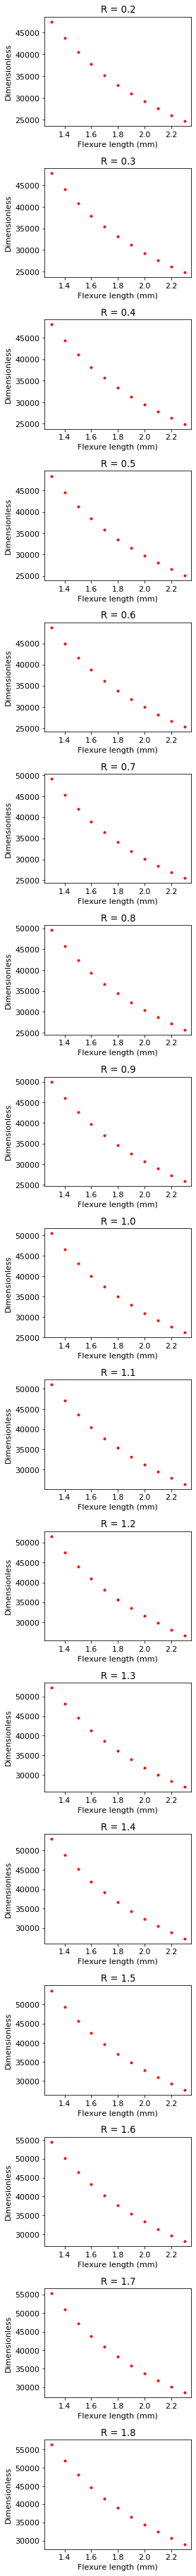

In [16]:
trend_plot(df5, 'l', 'Dimensionless')

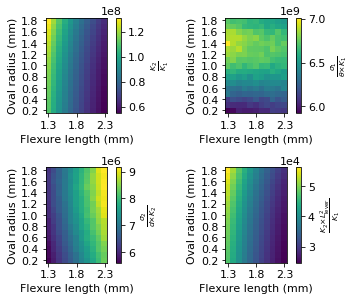

In [17]:
l = df5['Flexure length (mm)'].unique()
ln = np.shape(l)[0]
l = np.append(l, [l[-1] + (l[1] - l[0])]) - ((l[1] - l[0]) / 2.0)
r = df5['Oval radius (mm)'].unique()
rn = np.shape(r)[0]
r = np.append(r, [r[-1] + (r[1] - r[0])]) - ((r[1] - r[0]) / 2.0)

fig, ax = plt.subplots(2, 2, figsize = (5.76, 4.32))

ax[0, 0].set_xlabel('Flexure length (mm)')
ax[0, 0].set_ylabel('Oval radius (mm)')
ax[0, 1].set_xlabel('Flexure length (mm)')
ax[0, 1].set_ylabel('Oval radius (mm)')
ax[1, 0].set_xlabel('Flexure length (mm)')
ax[1, 0].set_ylabel('Oval radius (mm)')
ax[1, 1].set_xlabel('Flexure length (mm)')
ax[1, 1].set_ylabel('Oval radius (mm)')

z = df5['Parameter1'].values.reshape(ln, rn)
z = z.transpose()
graph = ax[0, 0].pcolormesh(l, r, z, vmin = df5['Parameter1'].min(), vmax = df5['Parameter1'].max())
cbar = plt.colorbar(graph, ax = ax[0, 0])
cbar.ax.set_ylabel(r'$\frac{K_2}{K_1}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = df5['Parameter2'].values.reshape(ln, rn)
z = z.transpose()
graph = ax[0, 1].pcolormesh(l, r, z, vmin = df5['Parameter2'].min(), vmax = df5['Parameter2'].max())
cbar = plt.colorbar(graph, ax = ax[0, 1])
cbar.ax.set_ylabel(r'$\frac{\sigma_1}{{\theta}{\times}{K_1}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = df5['Parameter3'].values.reshape(ln, rn)
z = z.transpose()
graph = ax[1, 0].pcolormesh(l, r, z, vmin = df5['Parameter3'].min(), vmax = df5['Parameter3'].max())
cbar = plt.colorbar(graph, ax = ax[1, 0])
cbar.ax.set_ylabel(r'$\frac{\sigma_2}{{d}{\times}{K_2}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = df5['Dimensionless'].values.reshape(ln, rn)
z = z.transpose()
graph = ax[1, 1].pcolormesh(l, r, z, vmin = df5['Dimensionless'].min(), vmax = df5['Dimensionless'].max())
cbar = plt.colorbar(graph, ax = ax[1, 1])
cbar.ax.set_ylabel(r'$\frac{{K_2}{\times}{L_{\mathregular{lever}}^2}}{K_1}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))

ax[0, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 0].set_yticks(np.arange(df5['Oval radius (mm)'].min(), df5['Oval radius (mm)'].max() + 0.2, 0.2))
ax[0, 1].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 1].set_yticks(np.arange(df5['Oval radius (mm)'].min(), df5['Oval radius (mm)'].max() + 0.2, 0.2))
ax[1, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[1, 0].set_yticks(np.arange(df5['Oval radius (mm)'].min(), df5['Oval radius (mm)'].max() + 0.2, 0.2))
ax[1, 1].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[1, 1].set_yticks(np.arange(df5['Oval radius (mm)'].min(), df5['Oval radius (mm)'].max() + 0.2, 0.2))

ax[0, 0].set_aspect(1)
ax[0, 1].set_aspect(1)
ax[1, 0].set_aspect(1)
ax[1, 1].set_aspect(1)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.savefig('initial_analysis_cutout_oval.pdf')
plt.show()

In [18]:
df6 = df2[['Flexure length (mm)', 'Oval radius (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df6['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df6['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df6['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df6['Stiffness ratio'] = df5['Dimensionless']
df6.to_csv('cutout_oval_final.csv', index = False)